# Introduction

describe what...

## Libraries

In [61]:
# for scientific computing with Python
import pandas as pd
import numpy as np
import os as os

# charting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sn

## Load Data

In [62]:
oecdDf = pd.read_csv('../DataAnalytics/Data/OECD_QualityOfLife.csv', sep=',')

## Clean Data

In [63]:
oecdDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        24 non-null     object 
 1   HofstederPowerDx               24 non-null     int64  
 2   HofstederIndividuality         24 non-null     int64  
 3   HofstederMasculinity           24 non-null     int64  
 4   HofstederUncertaintyAvoidance  24 non-null     int64  
 5   HofstederLongtermOrientation   24 non-null     int64  
 6   HofstederIndulgence            24 non-null     int64  
 7   Patents                        24 non-null     int64  
 8   PatentsPerCapita               24 non-null     int64  
 9   Diversity_Ethnic               24 non-null     float64
 10  Diversity_Linguistic           24 non-null     float64
 11  Diversity_Religious            24 non-null     float64
 12  ReligionMatters                22 non-null     float

### Set Index on Countries

In [64]:
oecdDf.set_index(oecdTrimmed.columns[0], inplace=True)

### Drop Questionable Columns

In [65]:
oecdTrimmed = oecdDf.drop(oecdDf.iloc[:,26:36], axis=1, inplace=False)
#oecdTrimmed.info()#oecdTrimmed.info()

In [66]:
oecdTrimmed.drop(oecdTrimmed.columns[[14]], axis=1, inplace=True)
oecdTrimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 36 to 40
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        24 non-null     object 
 1   HofstederIndividuality         24 non-null     int64  
 2   HofstederMasculinity           24 non-null     int64  
 3   HofstederUncertaintyAvoidance  24 non-null     int64  
 4   HofstederLongtermOrientation   24 non-null     int64  
 5   HofstederIndulgence            24 non-null     int64  
 6   Patents                        24 non-null     int64  
 7   PatentsPerCapita               24 non-null     int64  
 8   Diversity_Ethnic               24 non-null     float64
 9   Diversity_Linguistic           24 non-null     float64
 10  Diversity_Religious            24 non-null     float64
 11  ReligionMatters                22 non-null     float64
 12  Protestantism                  24 non-null     floa

### Drop Asia

In [67]:
oecdTrimmed.drop('Korea',inplace=True)
oecdTrimmed.drop('Japan',inplace=True)


KeyError: "['Korea'] not found in axis"

## Charting OECD Analysis

### Countries

In [68]:
oecdTrimmed.index

Int64Index([36, 11, 65, 39, 18, 33, 68, 35, 60, 30, 28, 50, 54, 60, 40, 38, 22,
            31, 63, 57, 31, 34, 35, 40],
           dtype='int64', name='HofstederPowerDx')

In [69]:
oecdCorr = oecdTrimmed.corr()
#oecdCorr

### Filter for Significant Correlations

In [70]:
filtervalue = .5
filterDf = oecdCorr[((oecdCorr >= filtervalue) | (oecdCorr <= -filtervalue)) & (oecdCorr !=1.000)]
#filterDf


### Generate Heatmap

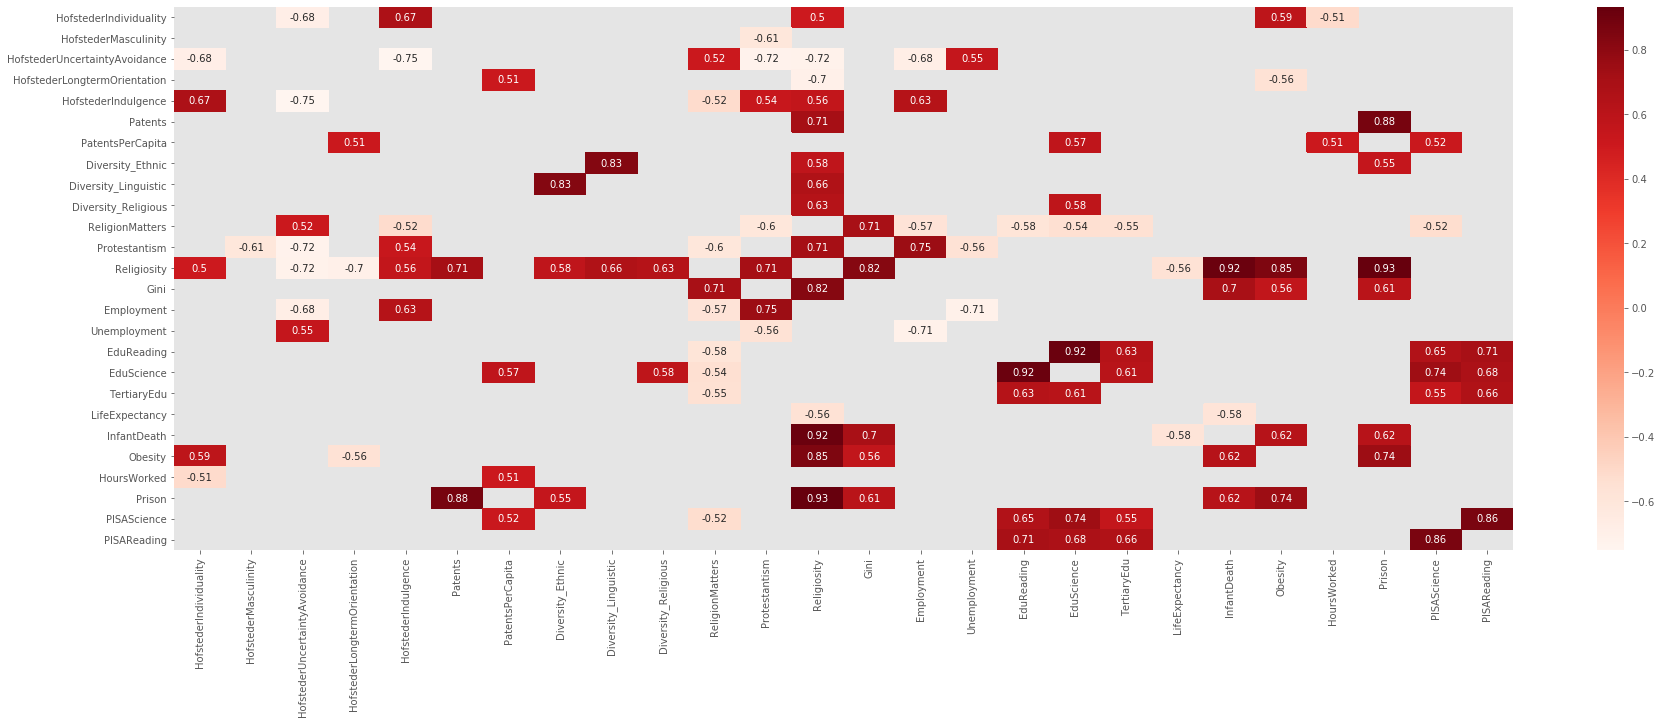

In [71]:
plt.figure(figsize=(30,10))
sn.heatmap(filterDf, annot=True, cmap="Reds")
plt.show()

## Correlate, Filter, and Flatten

### A Function

In [72]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

newList = corrFilter(oecdTrimmed, filtervalue)

In [73]:
newList

HofstederIndulgence           HofstederUncertaintyAvoidance   -0.752436
Protestantism                 HofstederUncertaintyAvoidance   -0.722509
Religiosity                   HofstederUncertaintyAvoidance   -0.719412
Employment                    Unemployment                    -0.711838
HofstederLongtermOrientation  Religiosity                     -0.702352
                                                                 ...   
Prison                        Patents                          0.876815
EduScience                    EduReading                       0.915638
InfantDeath                   Religiosity                      0.918267
Religiosity                   Prison                           0.933103
HofstederIndividuality        HofstederIndividuality                NaN
Length: 64, dtype: float64

### A function for Search and Filter of the Series

In [74]:
def filterForLabels(df: pd.DataFrame, label) :
    try:
        sideLeft = df[label,]
    except:
        sideLeft = pd.DataFrame()

    try:
        sideRight = df[:,label]
    except:
        sideRight = pd.DataFrame()

    if sideLeft.empty and sideRight.empty:
        return pd.DataFrame()
    elif sideLeft.empty:        
        concat = sideRight.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    elif sideRight.empty:
        concat = sideLeft.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    else:
        concat = pd.concat([sideLeft,sideRight], axis=1)
        concat["Corr"] = concat[0].fillna(0) + concat[1].fillna(0)
        concat.drop(columns=[0,1], inplace=True)
        return concat

### Error Test

In [75]:
filterForLabels(newList, 'errortest')

""


In [76]:
filterForLabels(newList, 'HofstederMasculinity')

,Corr
Protestantism,-0.606479


In [77]:
filterForLabels(newList, 'HofstederPowerDx')

""


### Relevant Results - Wellbeing

In [78]:
filterForLabels(newList, 'Gini')

,Corr
ReligionMatters,0.706751
Religiosity,0.821761
Obesity,0.564622
Prison,0.608696
InfantDeath,0.702415


In [79]:
filterForLabels(newList, 'InfantDeath')

,Corr
LifeExpectancy,-0.575760
Prison,0.617201
Obesity,0.623920
Gini,0.702415
Religiosity,0.918267


In [80]:
filterForLabels(newList, 'Obesity')

,Corr
Gini,0.564622
HofstederIndividuality,0.590268
Prison,0.744867
HofstederLongtermOrientation,-0.560621
InfantDeath,0.623920
Religiosity,0.851166


In [81]:
filterForLabels(newList, 'Protestantism')

,Corr
HofstederUncertaintyAvoidance,-0.722509
Unemployment,-0.557845
HofstederIndulgence,0.536424
Religiosity,0.710005
HofstederMasculinity,-0.606479
ReligionMatters,-0.601954
Employment,0.752702


In [82]:
filterForLabels(newList, 'ReligionMatters')

,Corr
Protestantism,-0.601954
EduScience,-0.540493
PISAScience,-0.523138
HofstederIndulgence,-0.519778
HofstederUncertaintyAvoidance,0.515928
EduReading,-0.583921
Employment,-0.574547
TertiaryEdu,-0.545041
Gini,0.706751


In [83]:
filterForLabels(newList, 'Religiosity')

,Corr
HofstederUncertaintyAvoidance,-0.719412
LifeExpectancy,-0.561020
HofstederIndividuality,0.500241
Patents,0.714732
Obesity,0.851166
Prison,0.933103
HofstederLongtermOrientation,-0.702352
HofstederIndulgence,0.558697
Diversity_Ethnic,0.577032
Diversity_Religious,0.634116


### Relevant Results - Education

In [84]:
filterForLabels(newList, 'PatentsPerCapita')

,Corr
EduScience,0.571725
HoursWorked,0.507169
HofstederLongtermOrientation,0.512250
PISAScience,0.519392


In [85]:
filterForLabels(newList, 'TertiaryEdu')

,Corr
ReligionMatters,-0.545041
PISAScience,0.552557
EduScience,0.612088
EduReading,0.631033
PISAReading,0.662233


In [86]:
filterForLabels(newList, 'PISAMath')

""


In [87]:
filterForLabels(newList, 'PISAReading')

,Corr
TertiaryEdu,0.662233
EduScience,0.677716
EduReading,0.705153
PISAScience,0.865000


In [88]:
filterForLabels(newList, 'PISAScience')

,Corr
PatentsPerCapita,0.519392
TertiaryEdu,0.552557
EduScience,0.735990
PISAReading,0.865000
ReligionMatters,-0.523138
EduReading,0.650509


### Relevant Results - Work

In [89]:
filterForLabels(newList, 'Employment')

,Corr
Unemployment,-0.711838
ReligionMatters,-0.574547
Protestantism,0.752702
HofstederUncertaintyAvoidance,-0.679724
HofstederIndulgence,0.630638


In [90]:
filterForLabels(newList, 'Unemployment')

,Corr
HofstederUncertaintyAvoidance,0.547742
Employment,-0.711838
Protestantism,-0.557845


In [91]:
filterForLabels(newList, 'HoursWorked')

,Corr
PatentsPerCapita,0.507169
HofstederIndividuality,-0.514801
